<a href="https://colab.research.google.com/github/SIVASANKARI-17/stack-prediction/blob/main/DAY_5_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Create a sample DataFrame (replace with your actual data loading)
df = pd.DataFrame({
    'Annual_Income': [50000, 75000, 100000],
    'Spending_Score': [60, 80, 90],
    'Purchase_Frequency': [10, 15, 20],
    'Preferred_Category': ['Electronics', 'Clothing', 'Books']
})

scaler = MinMaxScaler()
df[['Annual_Income', 'Spending_Score']] = scaler.fit_transform(df[['Annual_Income', 'Spending_Score']])

standard_scaler = StandardScaler()
df[['Purchase_Frequency']] = standard_scaler.fit_transform(df[['Purchase_Frequency']])

label_encoder = LabelEncoder()
df['Preferred_Category'] = label_encoder.fit_transform(df['Preferred_Category'])
print(df)

   Annual_Income  Spending_Score  Purchase_Frequency  Preferred_Category
0            0.0        0.000000           -1.224745                   2
1            0.5        0.666667            0.000000                   1
2            1.0        1.000000            1.224745                   0


2

In [ ]:
import pandas as pd
import numpy as np

# Assume Last_Transaction_Days for now
# Replace with actual data if available
df['Last_Transaction_Days'] = [30, 60, 90]

df['Customer_Loyalty_Score'] = pd.cut(df['Spending_Score'] * df['Purchase_Frequency'],
                                      bins=[-1, 1000, 5000, np.inf],
                                      labels=['Low', 'Medium', 'High'])

df['Income_Level'] = pd.cut(df['Annual_Income'],
                            bins=[-1, 40000, 80000, np.inf],
                            labels=['Low', 'Medium', 'High'])

df['Engagement_Status'] = pd.cut(df['Last_Transaction_Days'] / df['Purchase_Frequency'],
                                 bins=[-1, 30, 180, np.inf],
                                 labels=['Active', 'Dormant', 'Churned'])
print(df)

   Annual_Income  Spending_Score  Purchase_Frequency  Preferred_Category  \
0            0.0        0.000000           -1.224745                   2   
1            0.5        0.666667            0.000000                   1   
2            1.0        1.000000            1.224745                   0   

  Customer_Loyalty_Score Income_Level  Last_Transaction_Days Engagement_Status  
0                    Low          Low                     30               NaN  
1                    Low          Low                     60           Churned  
2                    Low          Low                     90           Dormant  


3

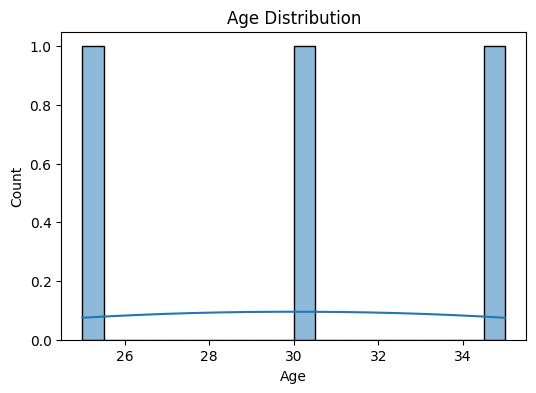

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your previous code to create and modify df) ...

# Add an 'Age' column to your DataFrame.
# Replace with your desired logic for generating or loading age data.
# For example:
df['Age'] = [25, 30, 35]  # Example age data, replace as needed


plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# ... (rest of your visualization code) ...

4

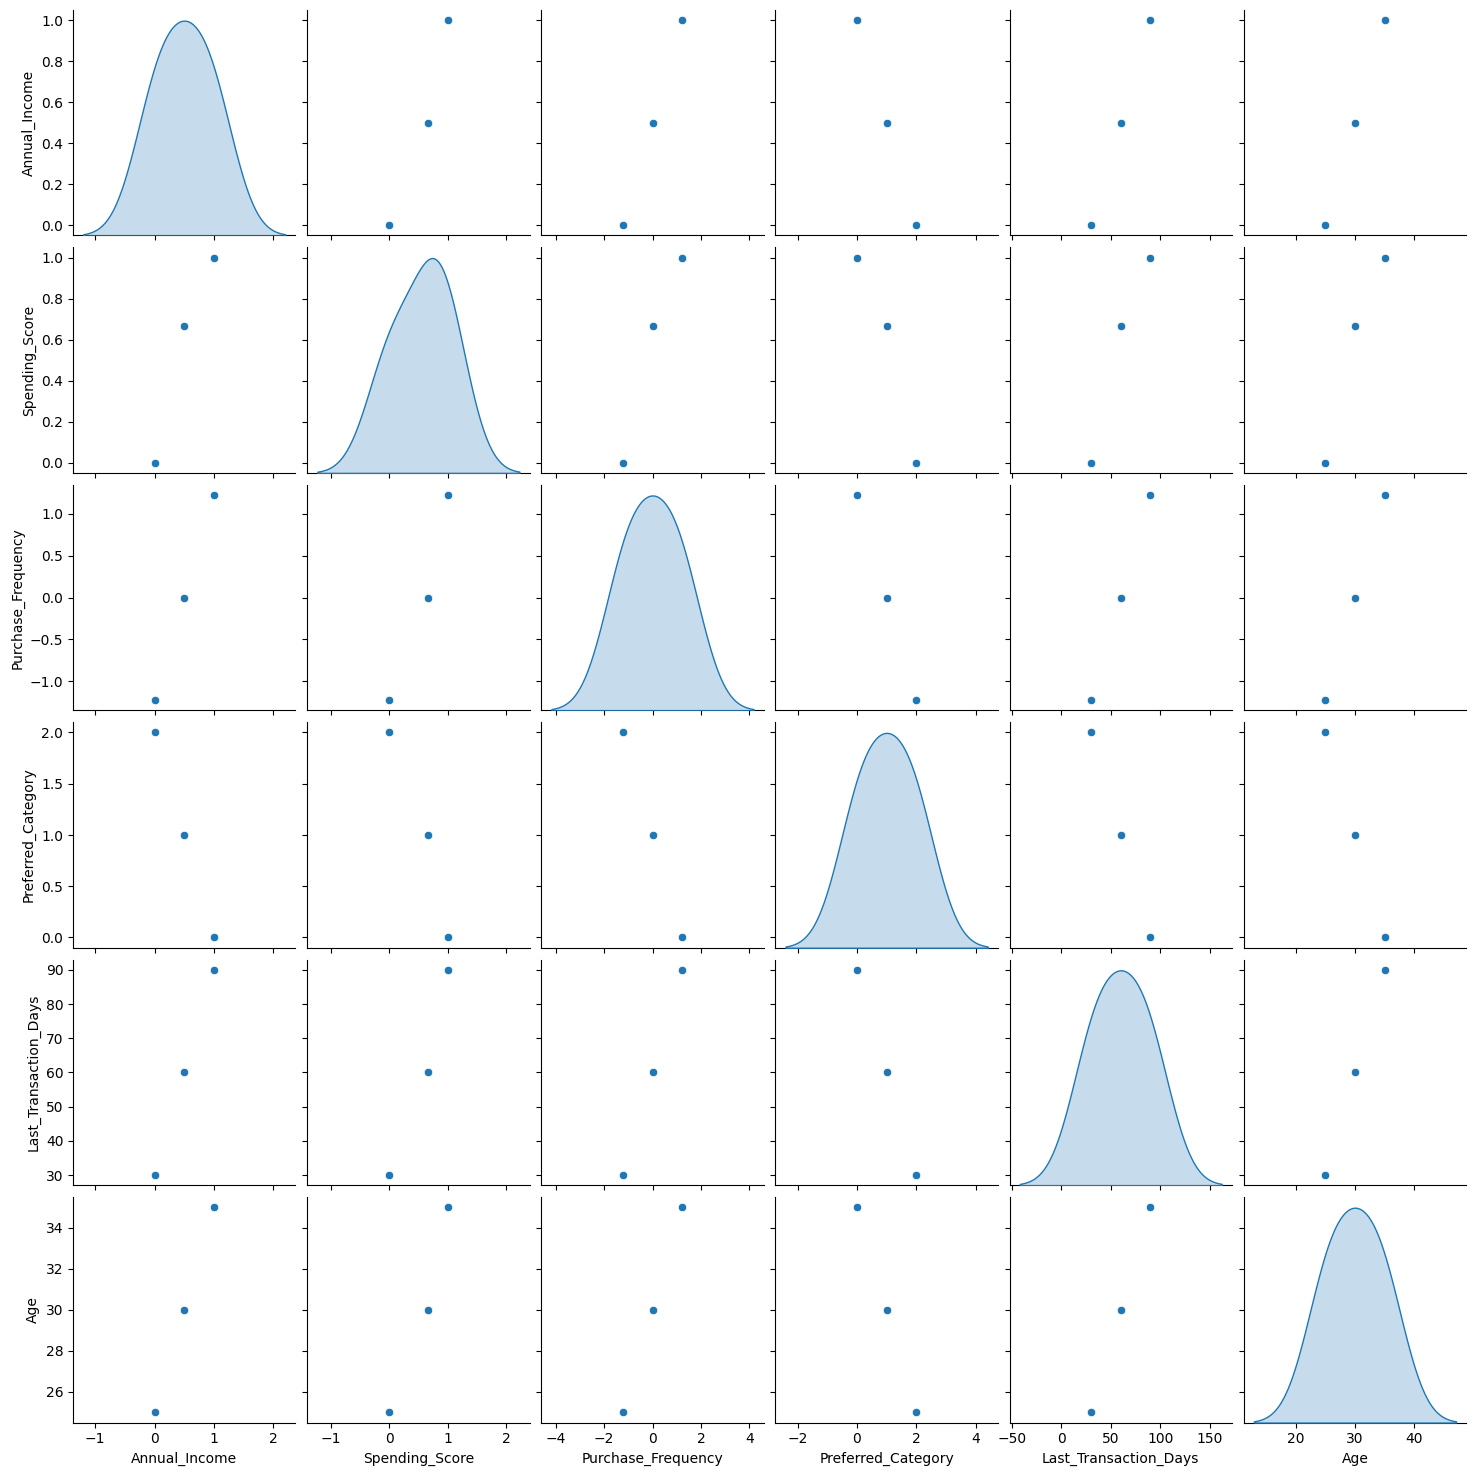

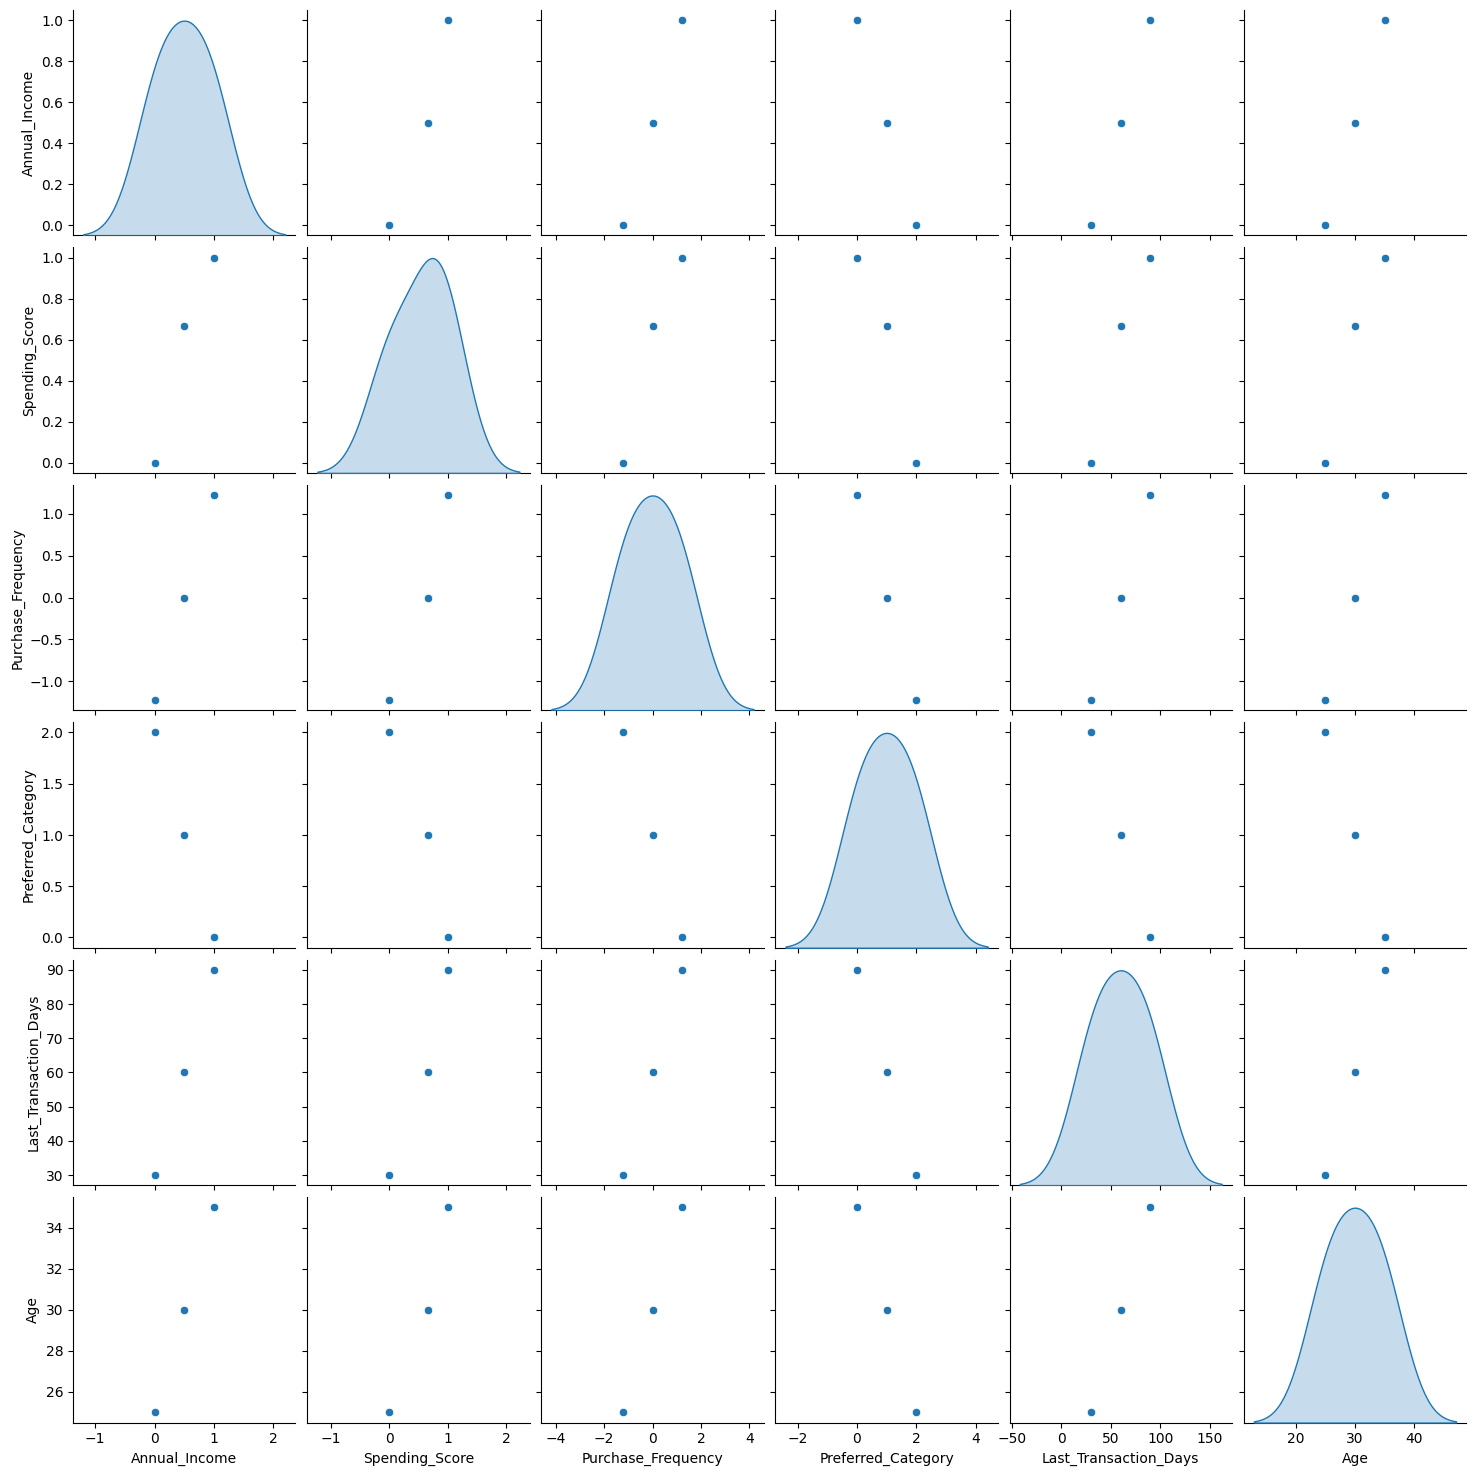

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, diag_kind='kde')
plt.show()
sns.pairplot(df, diag_kind='kde')
plt.show()

5

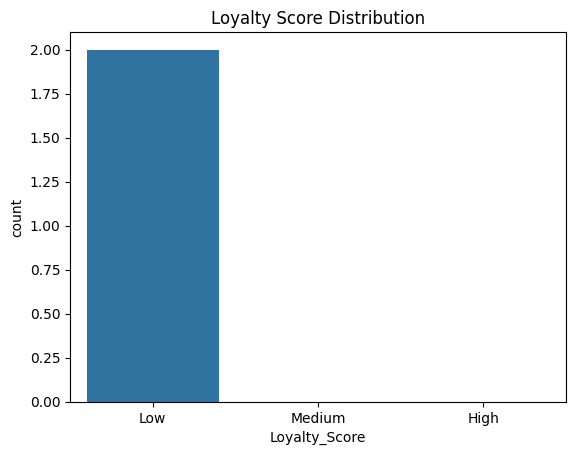

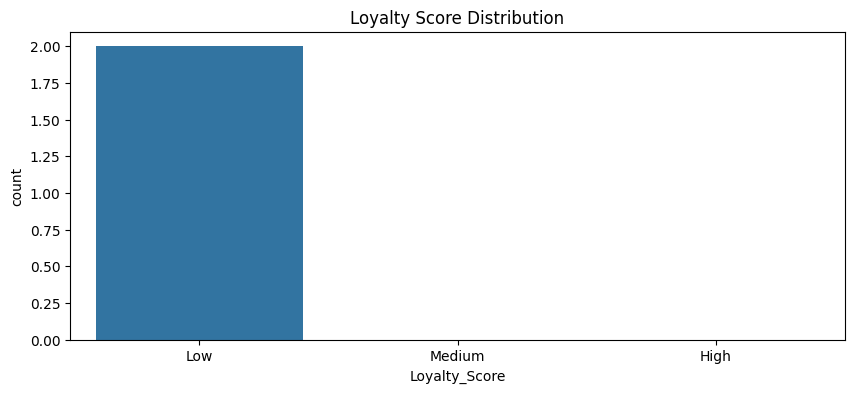

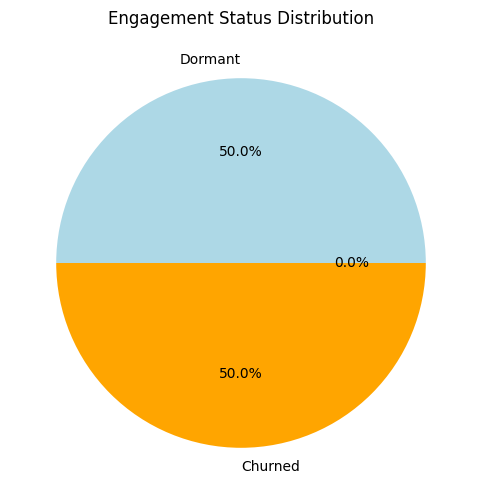

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Loyalty_Score'] = pd.cut(df['Spending_Score'] + df['Purchase_Frequency'],
                             bins=[0, 50, 100, float('inf')],
                             labels=['Low', 'Medium', 'High'])

sns.countplot(x='Loyalty_Score', data=df)
plt.title('Loyalty Score Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x='Loyalty_Score', data=df)
plt.title('Loyalty Score Distribution')
plt.show()

plt.figure(figsize=(6, 6))
df['Engagement_Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange', 'red'])
plt.title('Engagement Status Distribution')
plt.ylabel('')
plt.show()

6

In [ ]:
import plotly.express as px

# Assuming 'Purchase_Frequency' is the desired hover data
fig = px.scatter(
    df,
    x='Annual_Income',
    y='Spending_Score',
    color='Loyalty_Score',
    hover_data=['Purchase_Frequency'], # Removed 'Customer_ID'
    title='Annual Income vs Spending Score'
)
fig.show()

7

In [ ]:
# Identify and count missing values
print("Missing Values Count:\n", df.isnull().sum())

Missing Values Count:
 Annual_Income             0
Spending_Score            0
Purchase_Frequency        0
Preferred_Category        0
Customer_Loyalty_Score    0
Income_Level              0
Last_Transaction_Days     0
Engagement_Status         1
Age                       0
Loyalty_Score             1
dtype: int64


8

In [ ]:
# Option 1: Remove rows with missing values
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv("stude_ecom.csv")
df.head()
df_dropped = df.dropna()
print("\nData after dropping missing values:\n", df_dropped)